## **15. Code: BST**


### **Binary Search Tree**


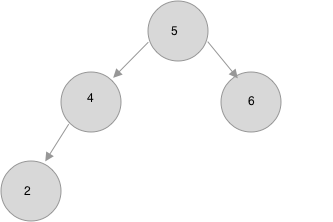

### **Define Node class**


In [2]:
# this code makes the tree that we'll traverse

class Node(object):

    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None

    def set_value(self, value):
        self.value = value

    def get_value(self):
        return self.value

    def set_left_child(self, left):
        self.left = left

    def set_right_child(self, right):
        self.right = right

    def get_left_child(self):
        return self.left

    def get_right_child(self):
        return self.right

    def has_left_child(self):
        return self.left != None

    def has_right_child(self):
        return self.right != None

    # define __repr_ to decide what a print statement displays for a Node object
    def __repr__(self):
        return f"Node({self.get_value()})"

    def __str__(self):
        return f"Node({self.get_value()})"


In [3]:
from collections import deque


class Queue():
    def __init__(self):
        self.q = deque()

    def enq(self, value):
        self.q.appendleft(value)

    def deq(self):
        if len(self.q) > 0:
            return self.q.pop()
        else:
            return None

    def __len__(self):
        return len(self.q)

    def __repr__(self):
        if len(self.q) > 0:
            s = "<enqueue here>\n_________________\n"
            s += "\n_________________\n".join([str(item) for item in self.q])
            s += "\n_________________\n<dequeue here>"
            return s
        else:
            return "<queue is empty>"


### **Define insert**


Let's assume that duplicates are overriden by the new node that is to be inserted. Other options are to keep a counter of duplicate nodes, or to keep a list of duplicates nodes with the same value.



In [4]:
class Tree():
    def __init__(self):
        self.root = None

    def set_root(self, value):
        self.root = Node(value)

    def get_root(self):
        return self.root

    def compare(self, node, new_node):
        """
        0 means new_node equals node
        -1 means new node less than existing node
        1 means new node greater than existing node 
        """
        if new_node.get_value() == node.get_value():
            return 0
        elif new_node.get_value() < node.get_value():
            return -1
        else:
            return 1

    """
    define insert here
    can use a for loop (try one or both ways)
    """

    def insert_with_loop(self, new_value):
        new_node = Node(new_value)
        node = self.get_root()
        if node == None:
            self.root = new_node
            return

        while (True):
            comparison = self.compare(node, new_node)
            if comparison == 0:
                # override with new node's value
                node.set_value(new_node.get_value())
                break  # override node, and stop looping
            elif comparison == -1:
                # go left
                if node.has_left_child():
                    node = node.get_left_child()
                else:
                    node.set_left_child(new_node)
                    break  # inserted node, so stop looping
            else:  # comparison == 1
                # go right
                if node.has_right_child():
                    node = node.get_right_child()
                else:
                    node.set_right_child(new_node)
                    break  # inserted node, so stop looping

    """
    define insert here (can use recursion)
    try one or both ways
    """

    def insert_with_recursion(self, value):

        if self.get_root() == None:
            self.set_root(value)
            return
        # otherwise, use recursion to insert the node
        self.insert_recursively(self.get_root(), Node(value))

    def insert_recursively(self, node, new_node):
        comparison = self.compare(node, new_node)
        if comparison == 0:
            # equal
            node.set_value(new_node.get_value())

        elif comparison == -1:
            # traverse left
            if node.has_left_child():
                self.insert_recursively(node.get_left_child(), new_node)

            else:
                node.set_left_child(new_node)

        else:  # comparison == 1
            # traverse right
            if node.has_right_child():
                self.insert_recursively(node.get_right_child(), new_node)
                
            else:
                node.set_right_child(new_node)

    def __repr__(self):
        level = 0
        q = Queue()
        visit_order = list()
        node = self.get_root()
        q.enq((node, level))
        while (len(q) > 0):
            node, level = q.deq()
            if node == None:
                visit_order.append(("<empty>", level))
                continue
            visit_order.append((node, level))
            if node.has_left_child():
                q.enq((node.get_left_child(), level + 1))
            else:
                q.enq((None, level + 1))

            if node.has_right_child():
                q.enq((node.get_right_child(), level + 1))
            else:
                q.enq((None, level + 1))

        s = "Tree\n"
        previous_level = -1
        for i in range(len(visit_order)):
            node, level = visit_order[i]
            if level == previous_level:
                s += " | " + str(node)
            else:
                s += "\n" + str(node)
                previous_level = level

        return s


In [5]:
tree = Tree()
tree.insert_with_loop(5)
tree.insert_with_loop(6)
tree.insert_with_loop(4)
tree.insert_with_loop(2)
tree.insert_with_loop(5) # insert duplicate
print(tree)

Tree

Node(5)
Node(4) | Node(6)
Node(2) | <empty> | <empty> | <empty>
<empty> | <empty>


In [6]:
tree = Tree()
tree.insert_with_recursion(5)
tree.insert_with_recursion(6)
tree.insert_with_recursion(4)
tree.insert_with_recursion(2)
tree.insert_with_recursion(5) # insert duplicate
print(tree)

Tree

Node(5)
Node(4) | Node(6)
Node(2) | <empty> | <empty> | <empty>
<empty> | <empty>


### **Search**

Define a search function that takes a value, and returns true if a node containing that value exists in the tree, otherwise false.



In [7]:
class Tree():
    def __init__(self):
        self.root = None

    def set_root(self, value):
        self.root = Node(value)

    def get_root(self):
        return self.root

    def compare(self, node, new_node):
        """
        0 means new_node equals node
        -1 means new node less than existing node
        1 means new node greater than existing node 
        """
        if new_node.get_value() == node.get_value():
            return 0
        elif new_node.get_value() < node.get_value():
            return -1
        else:
            return 1

    def insert(self, new_value):
        new_node = Node(new_value)
        node = self.get_root()
        if node == None:
            self.root = new_node
            return

        while (True):
            comparison = self.compare(node, new_node)
            if comparison == 0:
                # override with new node
                node = new_node
                break  # override node, and stop looping
            elif comparison == -1:
                # go left
                if node.has_left_child():
                    node = node.get_left_child()
                else:
                    node.set_left_child(new_node)
                    break  # inserted node, so stop looping
            else:  # comparison == 1
                # go right
                if node.has_right_child():
                    node = node.get_right_child()
                else:
                    node.set_right_child(new_node)
                    break  # inserted node, so stop looping

    """
    implement search
    """

    def search(self, value):
        node = self.get_root()
        s_node = Node(value)
        while (True):
            comparison = self.compare(node, s_node)
            if comparison == 0:
                return True
            elif comparison == -1:
                if node.has_left_child():
                    node = node.get_left_child()
                else:
                    return False
            else:
                if node.has_right_child():
                    node = node.get_right_child()
                else:
                    return False

    def __repr__(self):
        level = 0
        q = Queue()
        visit_order = list()
        node = self.get_root()
        q.enq((node, level))
        while (len(q) > 0):
            node, level = q.deq()
            if node == None:
                visit_order.append(("<empty>", level))
                continue
            visit_order.append((node, level))
            if node.has_left_child():
                q.enq((node.get_left_child(), level + 1))
            else:
                q.enq((None, level + 1))

            if node.has_right_child():
                q.enq((node.get_right_child(), level + 1))
            else:
                q.enq((None, level + 1))

        s = "Tree\n"
        previous_level = -1
        for i in range(len(visit_order)):
            node, level = visit_order[i]
            if level == previous_level:
                s += " | " + str(node)
            else:
                s += "\n" + str(node)
                previous_level = level

        return s


In [8]:
tree = Tree()
tree.insert(5)
tree.insert(6)
tree.insert(4)
tree.insert(2)

print(f"""
search for 8: {tree.search(8)}
search for 2: {tree.search(2)}
""")
print(tree)


search for 8: False
search for 2: True

Tree

Node(5)
Node(4) | Node(6)
Node(2) | <empty> | <empty> | <empty>
<empty> | <empty>


## **Bonus: deletion**


Try implementing deletion yourself. You can also check out this explanation  [here](https://www.geeksforgeeks.org/binary-search-tree-set-2-delete/)



**Solution notebook**


In [9]:
class Tree():
    def __init__(self):
        self.root = None

    def set_root(self, value):
        self.root = Node(value)

    def get_root(self):
        return self.root

    def compare(self, node, new_node):
        """
        0 means new_node equals node
        -1 means new node less than existing node
        1 means new node greater than existing node 
        """
        if new_node.get_value() == node.get_value():
            return 0
        elif new_node.get_value() < node.get_value():
            return -1
        else:
            return 1

    def insert(self, new_value):
        new_node = Node(new_value)
        node = self.get_root()
        if node == None:
            self.root = new_node
            return

        while (True):
            comparison = self.compare(node, new_node)
            if comparison == 0:
                # override with new node
                node = new_node
                break  # override node, and stop looping
            elif comparison == -1:
                # go left
                if node.has_left_child():
                    node = node.get_left_child()
                else:
                    node.set_left_child(new_node)
                    break  # inserted node, so stop looping
            else:  # comparison == 1
                # go right
                if node.has_right_child():
                    node = node.get_right_child()
                else:
                    node.set_right_child(new_node)
                    break  # inserted node, so stop looping

    """
    implement search
    """

    def search(self, value):
        node = self.get_root()
        s_node = Node(value)
        while (True):
            comparison = self.compare(node, s_node)
            if comparison == 0:
                return True
            elif comparison == -1:
                if node.has_left_child():
                    node = node.get_left_child()
                else:
                    return False
            else:
                if node.has_right_child():
                    node = node.get_right_child()
                else:
                    return False

    """
    implement delete
    """

    def minValueNode(self, node):
        """
        Given a non-empty binary search tree, return the
        node with minimum key value found in that tree. Note
        that the entire tree does not need to be searched
        """
        current = node

        # loop down to find the leftmost leaf
        while (current.has_left_child()):
            current = current.left

        return current

    def deleteNode(self, root, key):
        """
        delete the key and returns the new root
        """
        # Base case
        if root is None:
            return root

        # if the key to be deleted is smaller than the root's key
        # then it lies in left-subtree
        if key < root.get_value():
            root.set_left_child(deleteNode(root.get_left_child(), key))

        # if the key to be deleted is greater than the root's key
        # than it lies in right-subtree
        elif (key > root.get_value()):
            root.set_right_child(deleteNode(root.get_right_child(), key))

        # if key is same as root's key, then this is the node to be deleted
        else:
            # Node with only one child or no child
            if not (root.has_left_child()):
                temp = root.get_right_child()
                root = None
                return temp
            elif not (root.has_right_child()):
                temp = root.get_left_child()
                root = None
                return temp

        # Node with two children: get the inorder successor
        # (smallest in the right subtree)
        temp = minValueNode(root.get_right_child())

        # Copy the inorder successor's content to this node
        root.set_value(temp.get_value())

        # Delete the inorder successor
        root.set_right_child(deleteNode(
            root.get_right_child(), temp.get_value()))

        return root

    def __repr__(self):
        level = 0
        q = Queue()
        visit_order = list()
        node = self.get_root()
        q.enq((node, level))
        while (len(q) > 0):
            node, level = q.deq()
            if node == None:
                visit_order.append(("<empty>", level))
                continue
            visit_order.append((node, level))
            if node.has_left_child():
                q.enq((node.get_left_child(), level + 1))
            else:
                q.enq((None, level + 1))

            if node.has_right_child():
                q.enq((node.get_right_child(), level + 1))
            else:
                q.enq((None, level + 1))

        s = "Tree\n"
        previous_level = -1
        for i in range(len(visit_order)):
            node, level = visit_order[i]
            if level == previous_level:
                s += " | " + str(node)
            else:
                s += "\n" + str(node)
                previous_level = level

        return s


In [10]:
print(tree)


Tree

Node(5)
Node(4) | Node(6)
Node(2) | <empty> | <empty> | <empty>
<empty> | <empty>


In [11]:
tree2 = Tree()
tree2.insert(50)
tree2.insert(30)
tree2.insert(20)
tree2.insert(40)
tree2.insert(70)
tree2.insert(60)
tree2.insert(80)
print(tree2)

Tree

Node(50)
Node(30) | Node(70)
Node(20) | Node(40) | Node(60) | Node(80)
<empty> | <empty> | <empty> | <empty> | <empty> | <empty> | <empty> | <empty>


In [12]:
min_value = tree2.minValueNode(tree2.get_root())
print(min_value)

Node(20)


In [13]:
min_value = tree2.minValueNode(tree2.get_root())
print(min_value)

Node(20)
